<a href="https://colab.research.google.com/github/bharaniakella/Akellian_DL/blob/main/Multilayer_ann_classify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import torch
import torch.nn as nn
from matplotlib import pyplot as plt

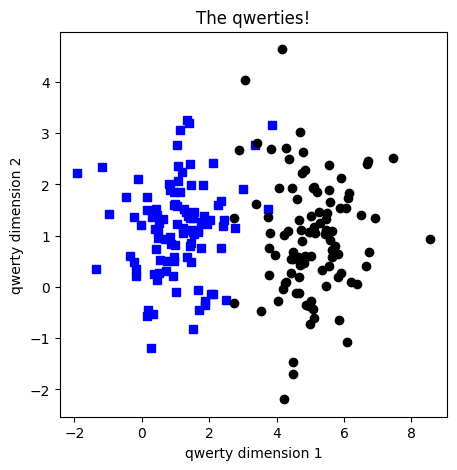

In [18]:
nPerClust = 100
blur = 1

A = [  1, 1 ]
B = [  5, 1 ]

# generate data
a = [ A[0]+np.random.randn(nPerClust)*blur , A[1]+np.random.randn(nPerClust)*blur ]
b = [ B[0]+np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur ]

# true labels
labels_np = np.vstack((np.zeros((nPerClust,1)),np.ones((nPerClust,1))))

# concatanate into a matrix
data_np = np.hstack((a,b)).T

# convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

# show the data
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko')
plt.title('The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

In [19]:
def create_model(lr):
  ann_classify=nn.Sequential(
   nn.Linear(2,16),
   nn.ReLU(),
   nn.Linear(16,16),
   nn.ReLU(),
   nn.Linear(16,1),
   nn.ReLU(),
   nn.Linear(1,1)
  )
  loss_fun=nn.BCEWithLogitsLoss()
  optimizer=torch.optim.SGD(ann_classify.parameters(),lr)
  return ann_classify, loss_fun, optimizer

In [20]:
num_epochs=500
losses=torch.zeros(num_epochs)
def train_model(ann_classify):

  for epochi in range(num_epochs):
    yhat=ann_classify(data)

    loss=loss_fun(yhat,labels)
    losses[epochi]=loss

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  predictions=ann_classify(data)
  total_acc=100*torch.mean(((predictions>0)==labels).float())

  return predictions,losses,total_acc

In [21]:
ann_classify, loss_fun, optimizer=create_model(0.05)
predictions,losses,total_acc=train_model(ann_classify)

In [22]:
total_acc

tensor(50.)

In [23]:
learning_rates=np.linspace(0.001,0.1,41)
predByLR=[]
All_losses=torch.zeros(len(learning_rates),num_epochs)
for i,lr in enumerate(learning_rates):
  ann_classify, loss_fun, optimizer=create_model(lr)
  predictions,losses,total_acc=train_model(ann_classify)
  predByLR.append(total_acc)
  All_losses[i,:]=losses


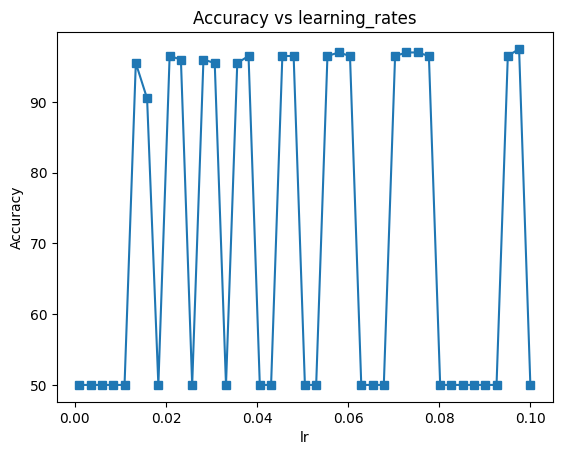

In [24]:
plt.plot(learning_rates,predByLR,'s-')
plt.title('Accuracy vs learning_rates')
plt.xlabel('lr')
plt.ylabel('Accuracy')
plt.show()

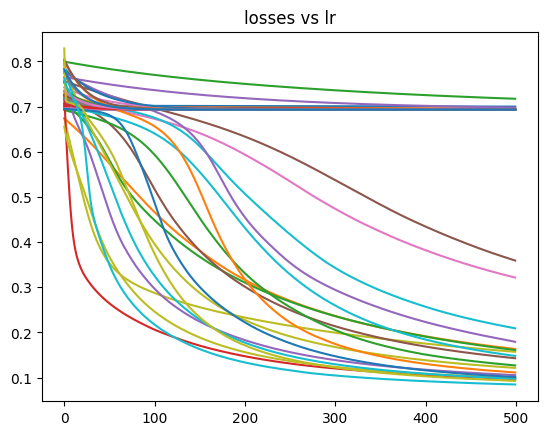

In [25]:
plt.plot(All_losses.detach().T)
plt.title('losses vs lr')
plt.show()